In [1]:
include("../functions.jl")
println("Avaliable threads: ", Threads.nthreads())

Avaliable threads: 32


In [18]:
solutions, constants, metadata = readSolution("/home/karnav/Documents/kylindros/results/fuSimpleVaryCoeffs/fuSimple/fuSimple_27-08_19-13-41_2025_N34.jld2");

repeat_profiles(solutions, constants; indices=[20, 100, 200], n_periods=4, figure_size=(1400, 600))
savefig("fuSimple_profiles.png")

"/home/karnav/Documents/kylindros/notebooks/fuSimple_profiles.png"

In [22]:
solutions, constants, metadata = readSolution("/home/karnav/Documents/kylindros/results/ferrofluid/ferrofluid_19-03_18-44-44_2025.jld2");

repeat_profiles(solutions, constants, indices=[10, 50, 100], n_periods=4, figure_size=(1400, 600))  # plots 5 periods
savefig("ferrofluid_profiles.png")

"/home/karnav/Documents/kylindros/notebooks/ferrofluid_profiles.png"

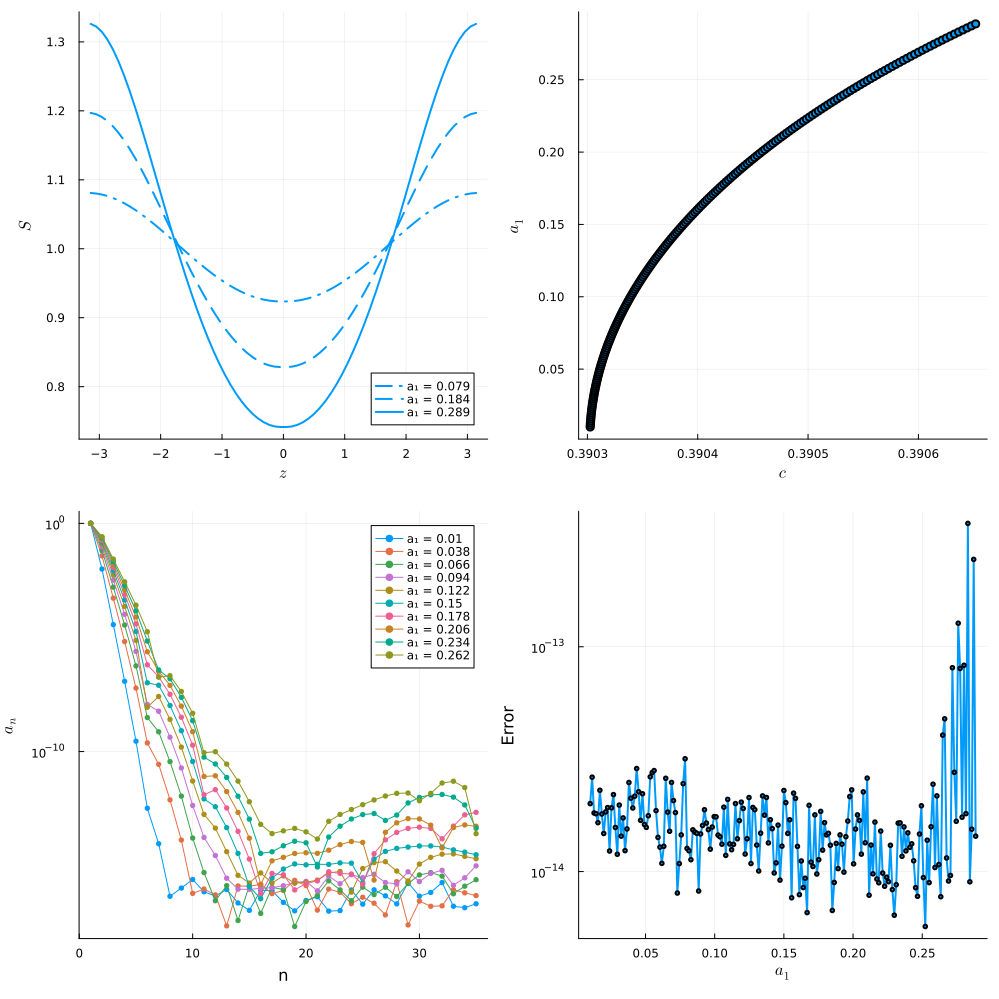

In [2]:
solutions, constants, metadata = readSolution("/home/karnav/Documents/kylindros/results/fuSimpleVaryCoeffs/fuSimple/fuSimple_27-08_19-13-41_2025_N34.jld2")

plotEverything(solutions, constants, metadata)

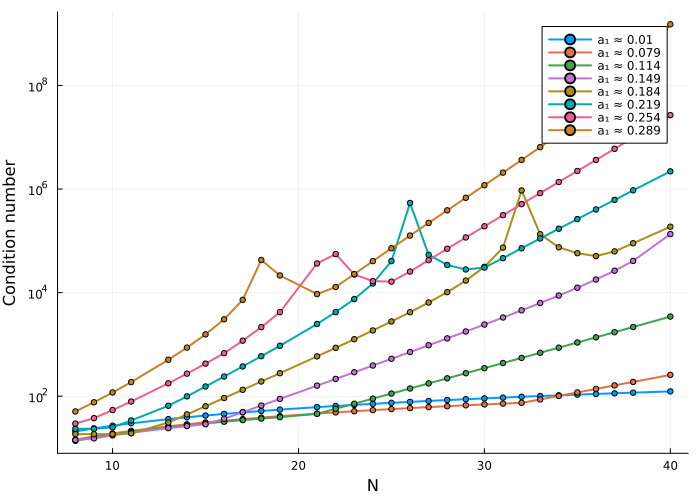

In [5]:
p = plot_metric_vs_N("/home/karnav/Documents/kylindros/results/fuSimpleVaryCoeffs/fuSimple"; indices=[1, 50, 75, 100, 125, 150, 175, 200], metric=:condition)

It's does not simply get better with N. Sometimes it gets (locally) worse. It's reminicent of resonance.  

Branch point 20 of 200, 3 iterations.
Branch point 40 of 200, 3 iterations.
Branch point 60 of 200, 3 iterations.
Branch point 80 of 200, 3 iterations.
Branch point 100 of 200, 3 iterations.
Branch point 120 of 200, 3 iterations.
Branch point 140 of 200, 3 iterations.
Branch point 160 of 200, 3 iterations.
Branch point 180 of 200, 3 iterations.
Branch point 200 of 200, 4 iterations.
Saved solution branch to fuSimple_25-08_10-58-56_2025.jld2
 21.356951 seconds (552.92 M allocations: 24.038 GiB, 5.80% gc time, 138.52% compilation time: <1% of which was recompilation)


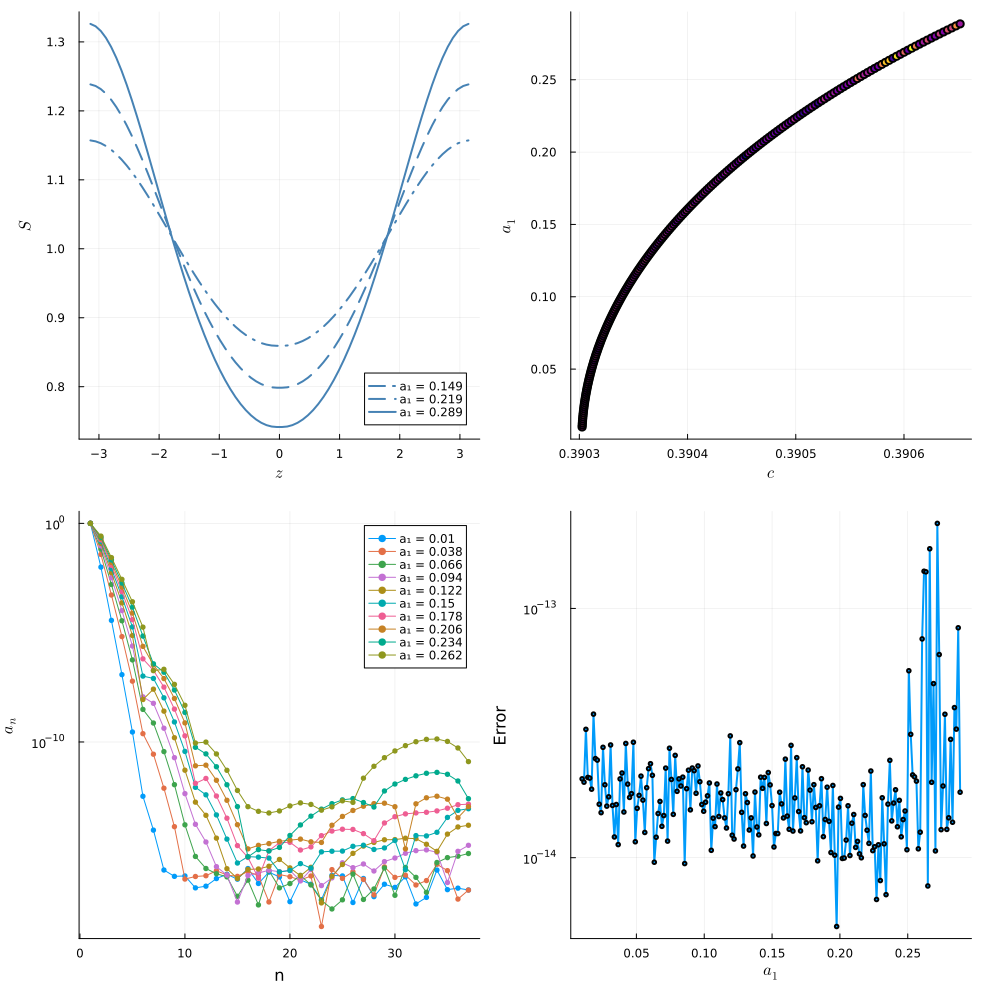

In [ ]:
## Initialize 

branchN = 200
a1Vals = collect(range(0.01, 0.29, branchN + 1))

# Define the values for the parameters
N = 36
L = π
b = 0.1
λ2 = 1.5
vf = 1.0

# Create an instance of the Constants struct
constants = fuSimpleConstants(N, L, b, λ2, vf)

# initialize wave speed and wave number 
k1 = 1*π/constants.L
cInitial = c0(k1, constants)

# initial guess 
initial_guess = (1e-16).*ones(branchN+1, constants.N+2)
initial_guess[1,1:4] = [cInitial, 1.0, a1Vals[1], 1e-16]

## Compute solution branch
@time solutions, constants, metadata = bifurcation(initial_guess, a1Vals, branchN, constants, tol = 1e-12, solver = :NLSolver, max_iter = 10000, overwrite = true);

plotEverything(solutions, constants, metadata)

Found 1 duplicate saved results. Deleting (overwrite = true) and re-computing.
Branch point 20 of 200, 3 iterations.
Branch point 40 of 200, 3 iterations.
Branch point 60 of 200, 3 iterations.
Branch point 80 of 200, 3 iterations.
Branch point 100 of 200, 3 iterations.
Branch point 120 of 200, 3 iterations.
Branch point 140 of 200, 3 iterations.
Branch point 160 of 200, 3 iterations.
Branch point 180 of 200, 3 iterations.
Branch point 200 of 200, 4 iterations.
Saved solution branch to fuSimple_22101623_N36.jld2
 40.964694 seconds (555.40 M allocations: 23.908 GiB, 3.74% gc time, 76.21% compilation time: 1% of which was recompilation)


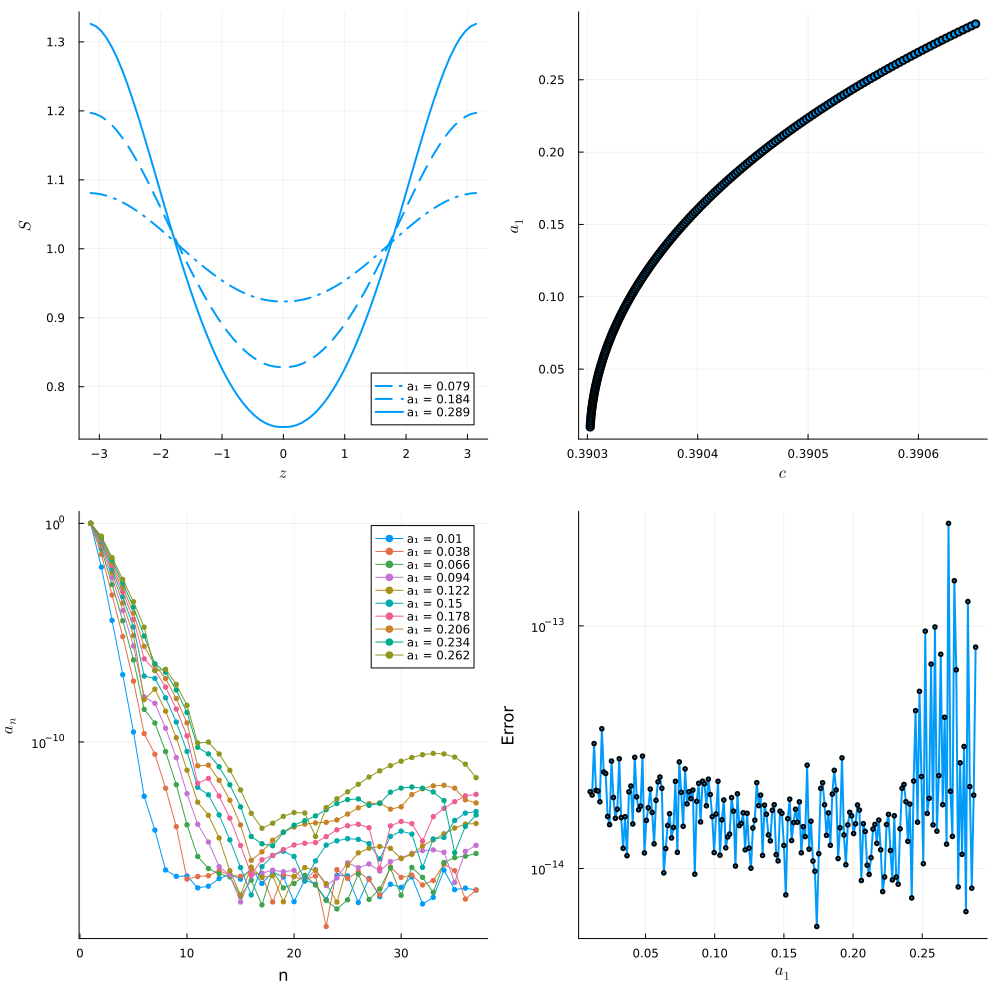

In [2]:
## Initialize 

branchN = 200
a1Vals = collect(range(0.01, 0.29, branchN + 1))

# Define the values for the parameters
N = 36
L = π
b = 0.1
λ2 = 1.5
vf = 1.0

# Create an instance of the Constants struct
constants = fuSimpleConstants(N, L, b, λ2, vf)

# initialize wave speed and wave number 
k1 = 1*π/constants.L
cInitial = c0(k1, constants)

# initial guess 
initial_guess = (1e-16).*ones(branchN+1, constants.N+2)
initial_guess[1,1:4] = [cInitial, 1.0, a1Vals[1], 1e-16]

## Compute solution branch
@time solutions, constants, metadata = bifurcation(initial_guess, a1Vals, branchN, constants, tol = 1e-12, solver = :NLSolver, max_iter = 10000, overwrite = true);

plotEverything(solutions, constants, metadata)

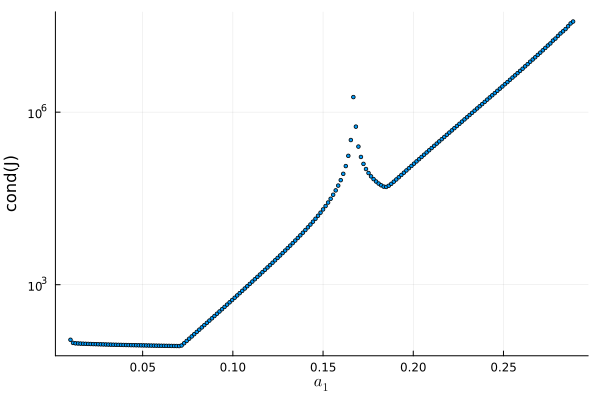

In [9]:
plot_condition_numbers(metadata)

In [8]:
function plot_condition_numbers(metadata)
	
	## plot condition numbers vs amplitude
	
	a1Vals = metadata["a1Vals"]
	condition_numbers = metadata["condition_numbers"]
	
	p = scatter(a1Vals[1:end-1], condition_numbers, 
		xlabel = L"a_1", 
		ylabel = "cond(J)", 
		legend = false, 
		markersize = 2,
		yaxis = :log10)
	
	return p
end

plot_condition_numbers (generic function with 1 method)

In [6]:
## Initialize 

branchN = 200
a1Vals = collect(range(0.01, 0.25, branchN + 1))

# Define the values for the parameters
N = 60
L = π
b = 0.1
λ2 = 1.5
vf = 1.0

# Create an instance of the Constants struct
constants = fuSimpleConstants(N, L, b, λ2, vf)

# initialize wave speed and wave number 
k1 = 1*π/constants.L
cInitial = c0(k1, constants)

# initial guess 
initial_guess = (1e-16).*ones(branchN+1, constants.N+2)
initial_guess[1,1:4] = [cInitial, 1.0, a1Vals[1], 1e-16]

## Compute solution branch
@time solutions, constants, metadata = bifurcation(initial_guess, a1Vals, branchN, constants, tol = 1e-12, solver = :NLSolver, max_iter = 10000, overwrite = true);

Branch point 20 of 200, 3 iterations.
Branch point 40 of 200, 3 iterations.
Branch point 60 of 200, 3 iterations.
Branch point 80 of 200, 3 iterations.
Branch point 100 of 200, 3 iterations.
Branch point 120 of 200, 3 iterations.
Branch point 140 of 200, 5 iterations.


CompositeException: TaskFailedException

    nested task error: InexactError: Float64(-8.635288076117975 - 3.141592653589793im)
    Stacktrace:
      [1] Real
        @ ./complex.jl:44 [inlined]
      [2] convert
        @ ./number.jl:7 [inlined]
      [3] setindex!
        @ ./array.jl:987 [inlined]
      [4] macro expansion
        @ ./broadcast.jl:973 [inlined]
      [5] macro expansion
        @ ./simdloop.jl:77 [inlined]
      [6] copyto!
        @ ./broadcast.jl:972 [inlined]
      [7] copyto!
        @ ./broadcast.jl:925 [inlined]
      [8] materialize!
        @ ./broadcast.jl:883 [inlined]
      [9] materialize!
        @ ./broadcast.jl:880 [inlined]
     [10] β_scaled(k::Float64, S::Vector{Float64}, b::Float64)
        @ Main ~/Documents/kylindros/core/equations.jl:70
     [11] macro expansion
        @ ~/Documents/kylindros/core/equations.jl:42 [inlined]
     [12] (::var"#49#threadsfor_fun#59"{var"#49#threadsfor_fun#58#60"{Vector{Float64}, Matrix{Float64}, Vector{Float64}, UnitRange{Int64}}})(tid::Int64; onethread::Bool)
        @ Main ./threadingconstructs.jl:253
     [13] #49#threadsfor_fun
        @ ./threadingconstructs.jl:220 [inlined]
     [14] (::Base.Threads.var"#1#2"{var"#49#threadsfor_fun#59"{var"#49#threadsfor_fun#58#60"{Vector{Float64}, Matrix{Float64}, Vector{Float64}, UnitRange{Int64}}}, Int64})()
        @ Base.Threads ./threadingconstructs.jl:154

...and 31 more exceptions.


┌ Warning: No strict ticks found
└ @ PlotUtils /home/karnav/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils /home/karnav/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: Invalid negative or zero value 0.0 found at series index 49 for log10 based yscale
└ @ Plots /home/karnav/.julia/packages/Plots/3u4B6/src/utils.jl:106
┌ Warning: No strict ticks found
└ @ PlotUtils /home/karnav/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils /home/karnav/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: Invalid negative or zero value 0.0 found at series index 49 for log10 based yscale
└ @ Plots /home/karnav/.julia/packages/Plots/3u4B6/src/utils.jl:106
┌ Warning: No strict ticks found
└ @ PlotUtils /home/karnav/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils /home/karnav/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict t

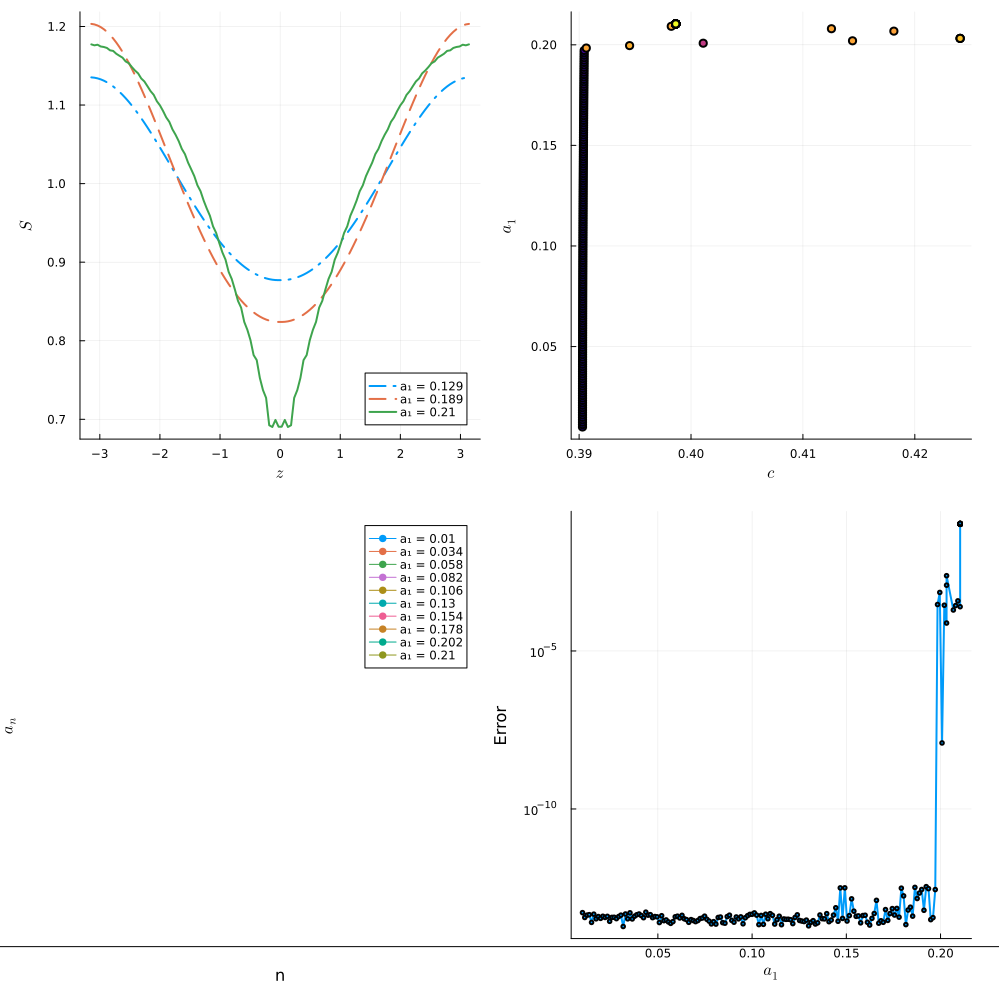

In [4]:
plotEverything(solutions, constants, metadata)

Branch point 20 of 200, 3 iterations.
Branch point 40 of 200, 3 iterations.
Branch point 60 of 200, 3 iterations.
Branch point 80 of 200, 3 iterations.
Branch point 100 of 200, 3 iterations.
Branch point 120 of 200, 3 iterations.
Branch point 140 of 200, 3 iterations.
Branch point 160 of 200, 3 iterations.
Branch point 180 of 200, 3 iterations.
Branch point 200 of 200, 4 iterations.
Saved solution branch to fuSimple_27-08_18-56-07_2025_N36.jld2
 18.934119 seconds (539.43 M allocations: 23.479 GiB, 9.57% gc time, 65.73% compilation time)


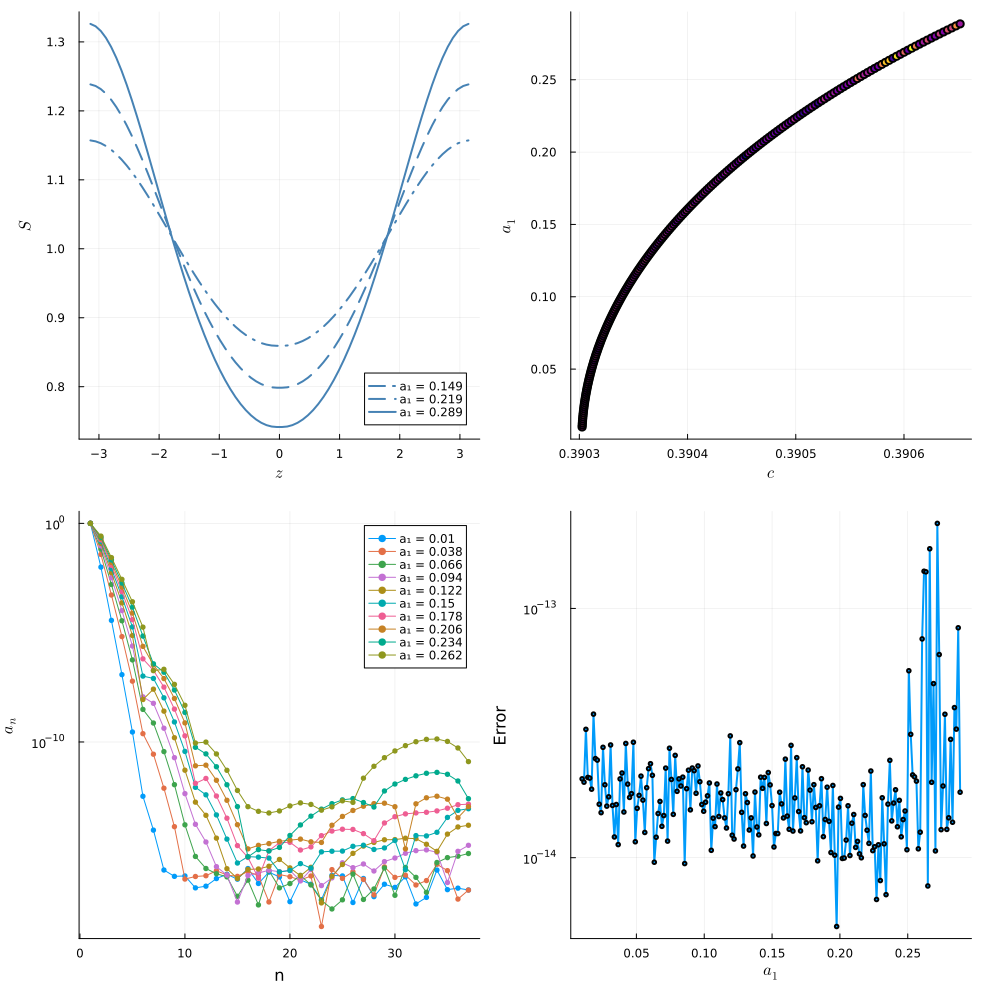

In [6]:
## Initialize 

branchN = 200
a1Vals = collect(range(0.01, 0.29, branchN + 1))

# Define the values for the parameters
N = 36
L = π
b = 0.1
λ2 = 1.5
vf = 1.0

# Create an instance of the Constants struct
constants = fuSimpleConstants(N, L, b, λ2, vf)

# initialize wave speed and wave number 
k1 = 1*π/constants.L
cInitial = c0(k1, constants)

# initial guess 
initial_guess = (1e-16).*ones(branchN+1, constants.N+2)
initial_guess[1,1:4] = [cInitial, 1.0, a1Vals[1], 1e-16]

## Compute solution branch
@time solutions, constants, metadata = bifurcation(initial_guess, a1Vals, branchN, constants, tol = 1e-12, solver = :NLSolver, max_iter = 10000, overwrite = true, save_subdir = "test");

plotEverything(solutions, constants, metadata)

Figure saved as: fuSimple_fourier_comparison.pdf


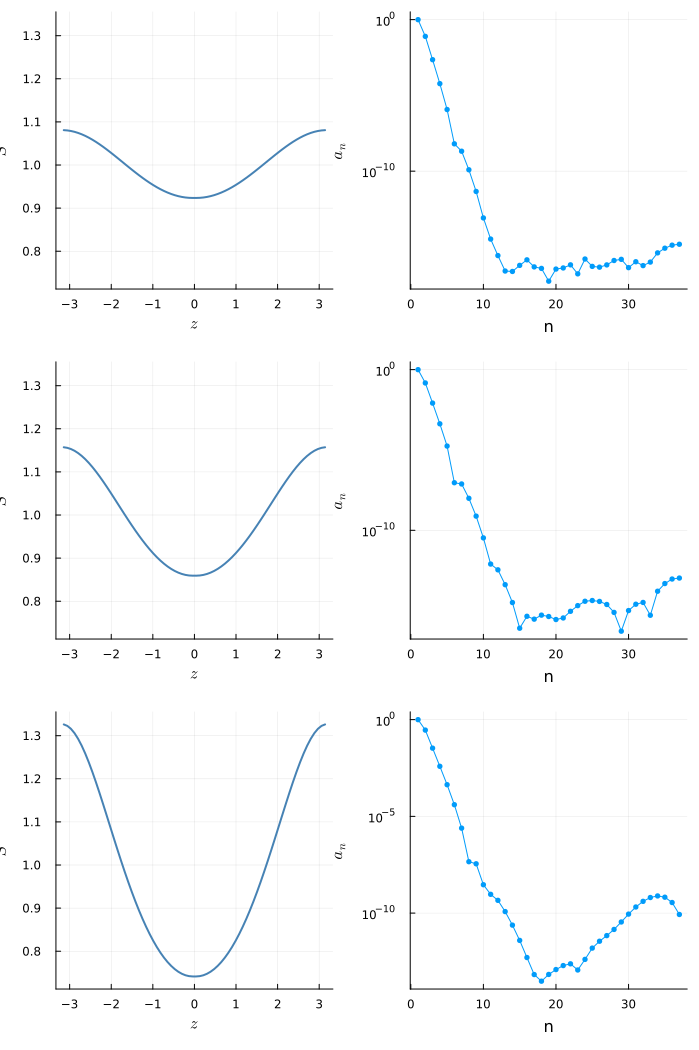

In [4]:
# read file 
solutions, constants, metadata = readSolution("../results/fuSimple/fuSimple_04-05_17-36-41_2025.jld2")

# plotEverything(solutions, constants, metadata)
plot_comparison_wrapper(solutions, constants, indices = [50, 100, 200], figure_size = (700, 700/2 * 3), save_figure = true, filename = "fuSimple_fourier_comparison.pdf")

In [8]:
# Create individual plots using existing functions
profile_plot = plot_profiles(solutions, constants; shift_profiles = true)
branch_plot = plot_branch(solutions, metadata)

# Combine side-by-side
combined_plot = plot(profile_plot, branch_plot, layout = (1,2), size = (900, 450))

# Display the combined plot
combined_plot

savefig(combined_plot, "fuSimple_core.pdf")

"/home/karnav/Documents/kylindros/notebooks/fuSimple_core.pdf"

In [3]:
# plotting 
file_name = "36.1.0e-12.100.Broyden"
profile_plot, branch_plot, coeff_plot, convergence_plot, error_plot = plotting(file_name)
plot(profile_plot, branch_plot, convergence_plot, error_plot, size=(1000,1000), layout = (2,2))

# get the constants for this run from the metadata file 


ArgumentError: ArgumentError: Cannot open 'results/36.1.0e-12.100.Broyden/solutions_36.1.0e-12.100.Broyden.dat': not a file

In [15]:
# plotting
profile_plot, branch_plot, coeff_plot, convergence_plot, error_plot = plotting("46.1.0e-12.100.LevenbergMarquardt")
plot(profile_plot, branch_plot, convergence_plot, error_plot, size=(1000,1000), layout = (2,2))

In [6]:
# plotting
profile_plot, branch_plot, coeff_plot, convergence_plot, error_plot = plotting("46.1.0e-8.100.LevenbergMarquardt")
plot(profile_plot, branch_plot, convergence_plot, error_plot, size=(1000,1000), layout = (2,2))

#### choosing parameters 
* plot $c_0$ vs. parameters (3-4 plots)
* doesn't matter if $c$, $omega$, etc. (look at wikipedia)

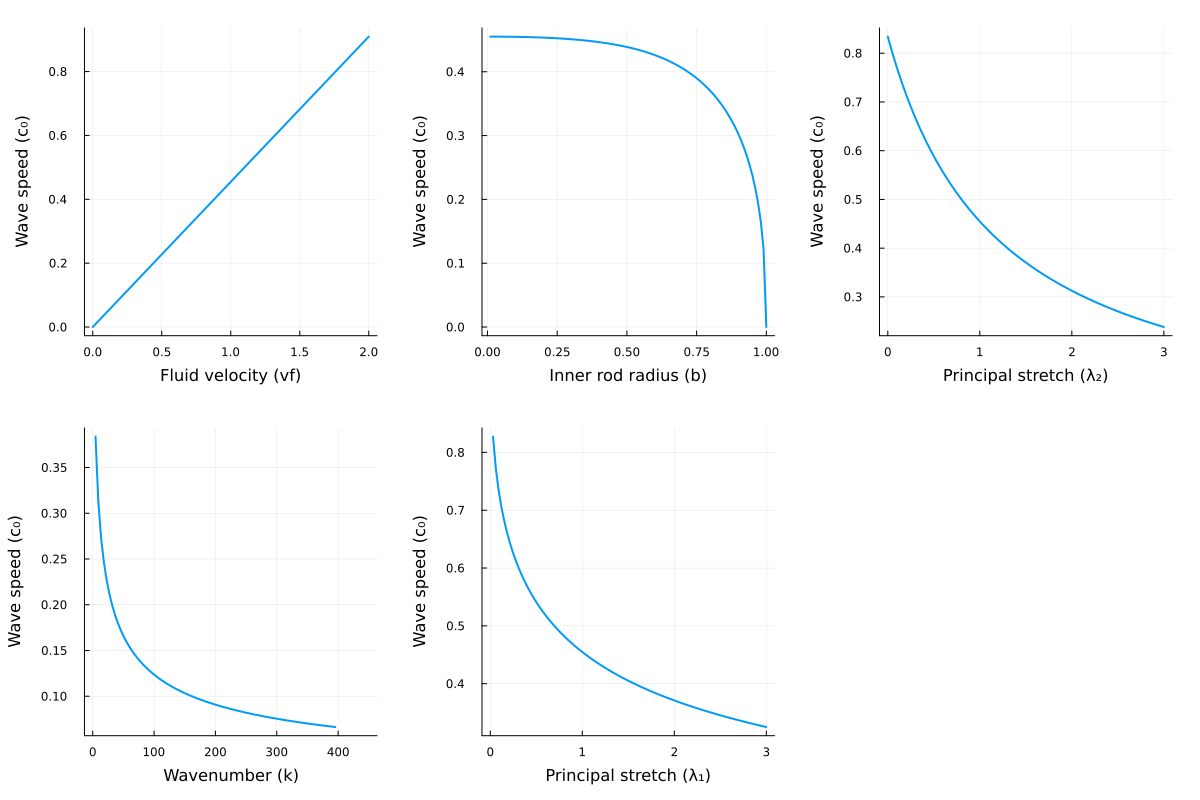

In [5]:
# Default parameters
N = 36
L = π/2
n = 1
k = (n * π) / L               # Wavenumber
default_b = 0.1
default_λ1 = 1.0
default_λ2 = 1.0
default_vf = 1.0

# Parameter ranges
vf_range = range(0, 2.0, length=100)
b_range = range(0.01, 1.0, length=100)
λ2_range = range(0, 3.0, length=100)

# 1. Varying vf (fluid velocity)
c0_vs_vf = zeros(length(vf_range))
for (i, vf) in enumerate(vf_range)
    constants = fuConstants(N, L, default_b, default_λ1, default_λ2, vf)
    c0_vs_vf[i] = c0(k, constants)
end

# 2. Varying b (inner rod radius)
c0_vs_b = zeros(length(b_range))
for (i, b) in enumerate(b_range)
    constants = fuConstants(N, L, b, default_λ1, default_λ2, default_vf)
    c0_vs_b[i] = c0(k, constants)
end

# 3. Varying λ2 (principal stretches)
c0_vs_λ2 = zeros(length(λ2_range))
for (i, λ2) in enumerate(λ2_range)
    constants = fuConstants(N, L, default_b, default_λ1, λ2, default_vf)
    c0_vs_λ2[i] = c0(k, constants)
end

# Create plots
p1 = plot(vf_range, c0_vs_vf, 
    xlabel="Fluid velocity (vf)", 
    ylabel="Wave speed (c₀)", 
    legend=false, lw=2)

p2 = plot(b_range, c0_vs_b, 
    xlabel="Inner rod radius (b)", 
    ylabel="Wave speed (c₀)", 
    legend=false, lw=2)

p3 = plot(λ2_range, c0_vs_λ2, 
    xlabel="Principal stretch (λ₂)", 
    ylabel="Wave speed (c₀)", 
    legend=false, lw=2)


# create one more plot where k is varied 
k_range = range(0, 450.0, length=100)
c0_vs_k = zeros(length(k_range))
for (i, j) in enumerate(k_range)
    constants = fuConstants(N, L, default_b, default_λ1, default_λ2, default_vf)
    c0_vs_k[i] = c0(j, constants)
end

p4 = plot(k_range, c0_vs_k, 
    xlabel="Wavenumber (k)", 
    ylabel="Wave speed (c₀)", 
    legend=false, lw=2)


λ1_range = range(0, 3.0, length=100)
c0_vs_λ1 = zeros(length(λ1_range))
for (i, λ1) in enumerate(λ1_range)
    constants = fuConstants(N, L, default_b, λ1, default_λ2, default_vf)
    c0_vs_λ1[i] = c0(k, constants)
end

p5 = plot(λ1_range, c0_vs_λ1, 
    xlabel="Principal stretch (λ₁)", 
    ylabel="Wave speed (c₀)", 
    legend=false, lw=2)

# Display plots in a layout
plot(p1, p2, p3, p4, p5, layout=(2,3), size=(1200, 800), margin=20px)

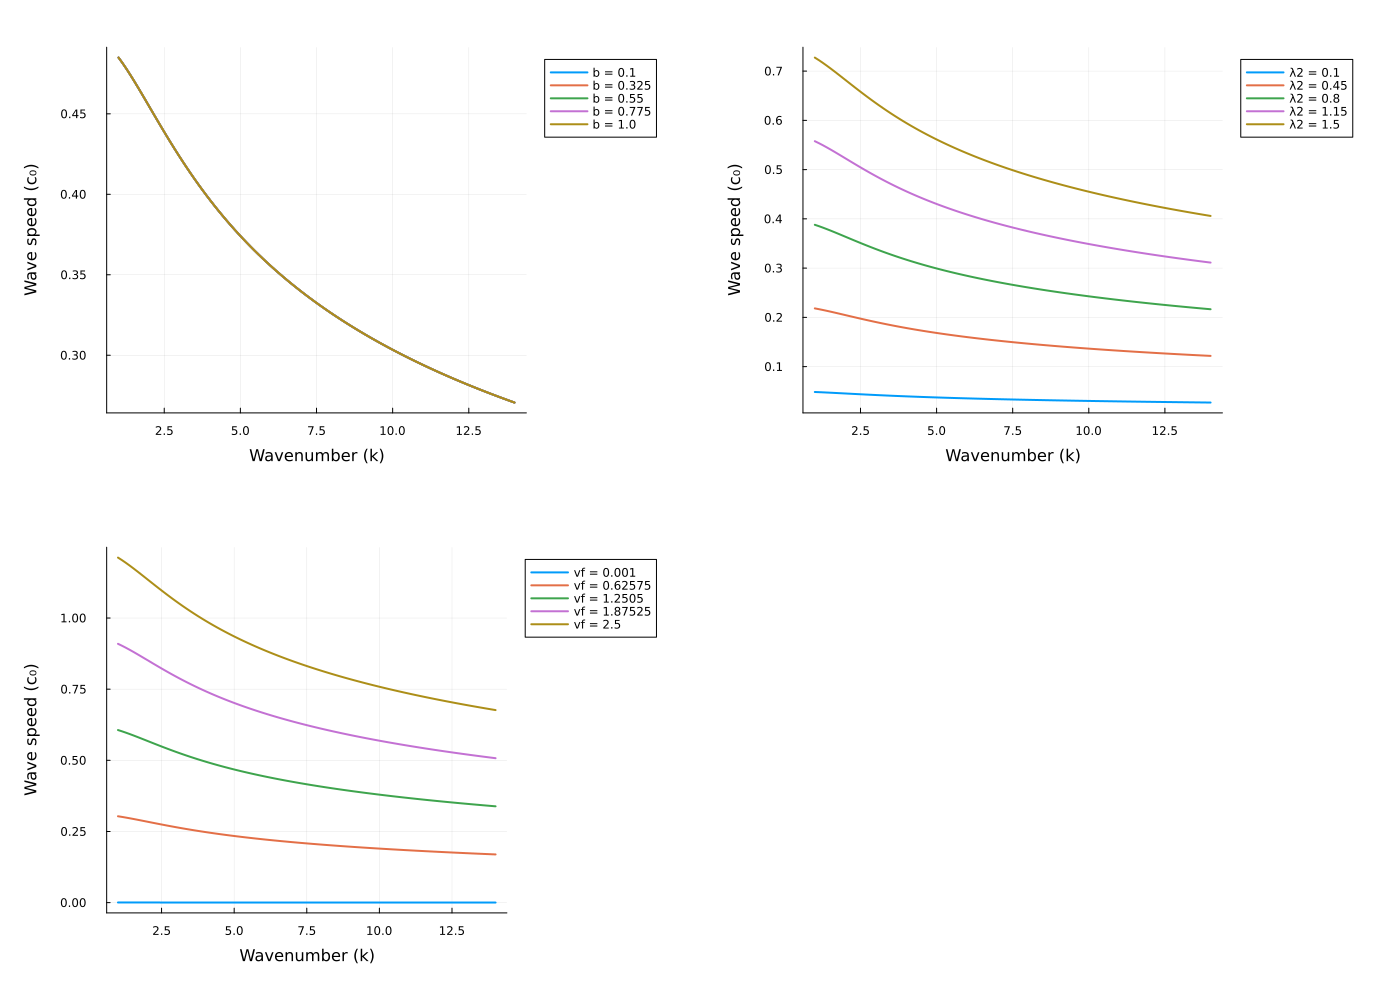

In [5]:
N = 36
L = π
b = 0.1
λ2 = 1.0
vf = 1.0

constants = fuSimpleConstants(N, L, b, λ2, vf)

k_range = range(1, 14, length=100)

pb = plot_dispersion(k_range, constants, vary_param = :b, param_range = range(0.1, 1.0, length=5))
pλ2 = plot_dispersion(k_range, constants, vary_param = :λ2, param_range = range(0.1, 1.5, length=5))
pvf = plot_dispersion(k_range, constants, vary_param = :vf, param_range = range(0.001, 2.5, length=5))

plot(pb, pλ2, pvf, layout=(2,2), size=(1400, 1000), margin=10mm)

**To Do:**

Saving Results: 
* Make sure everything is being saved correctly (_everything_) 
* Better file names
* Checking if solution already exists (option to stop the program and returns the filename) 

Plotting
* Individual plotting functions for each type of plot: 
    * wave profiles (3 on the same plot samples from different parts of the branch)
    * bifurcation branch (color bar for iterations taken)
    * error plot (across a branch / a1 values)
    * dispersion relation (for a vector of parameter values)

Solutions:
* more modes / resolution
* zero out modes (more frequently)

Precision
* Try using quadruple precision

Housekeeping/Speed: 
* Look through code line by line and: 
    * remove unnecessary computations
    * simplify + make it more readable 
    * minor speed improvments (probably lots of how hanging fruit)

New functionality: 
* Some way to do a parameter search (maybe even create own module)
    * computes branch for all combination of values 
    * keeps going even if there is an error — will need to predict the types of possible errors 
* Useful function to print the run details in a nice way


Error checking: 
* Check for and return error along with tolerance

In [ ]:
## Initialize 

branchN = 200
a1Vals = collect(range(0.01, 0.29, branchN + 1))

# Define the values for the parameters
N = 36
L = π
b = 0.1
λ2 = 1.0
vf = 1.0

# Create an instance of the Constants struct
constants = fuSimpleConstants(N, L, b, λ2, vf)

# initialize wave speed and wave number k1 = 1*π/constants.L
cInitial = c0(k1, constants)

# initial guess 
initial_guess = (1e-16).*ones(branchN+1, constants.N+2)
initial_guess[1,1:4] = [cInitial, 1.0, a1Vals[1], 1e-16]

## Compute solution branch
@time solutions, constants, metadata = bifurcation(initial_guess, a1Vals, branchN, constants, tol = 1e-12, solver = :NLSolver, max_iter = 10000, overwrite = true);

plotEverything(solutions, constants, metadata)

┌ Warning: read type fuSimpleConstants{Float64} was parametrized, but type fuSimpleConstants in workspace is not; reconstructing
└ @ JLD2 /home/karnav/.julia/packages/JLD2/SgtOb/src/data/reconstructing_datatypes.jl:551


MethodError: MethodError: no method matching compareConstants(::fuSimpleConstants, ::JLD2.ReconstructedMutable{Symbol("fuSimpleConstants{Float64}"), (:N, :L, :dz, :z, :b, :λ2, :vf), Tuple{Int64, Float64, Float64, Any, Float64, Float64, Float64}})
The function `compareConstants` exists, but no method is defined for this combination of argument types.

Closest candidates are:
  compareConstants(::Constants, !Matched::Constants)
   @ Main ~/Documents/kylindros/core/data.jl:95
